# Import Libraries

In [1172]:
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import DBSCAN
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Import Datasets

In [1173]:
df_or = pd.read_csv('datasets/OrderReports.csv')
print(df_or.head())

                  Date  Order # N. Revenue (formatted)      Status  \
0  2023-10-26 14:50:17  16698.0                RM57.80  processing   
1  2023-10-26 13:53:47  16697.0                RM32.90  processing   
2  2023-10-26 13:04:17  16696.0                RM32.90  processing   
3  2023-10-26 13:00:49  16695.0                RM82.70  processing   
4  2023-10-26 12:47:36  16694.0                RM32.90  processing   

                               Customer Customer type  \
0  AINAA SYAFIQAH ABD RAHMAN ABD RAHMAN           new   
1                              Ja Hasim           new   
2                             nasy anis           new   
3   Herny erdawati binti Mohamad Rashed           new   
4                      Suhaina Sulaiman           new   

                                          Product(s)  Items sold  N. Revenue  \
0  1× LIP BOOSTER - WATERMELON, 1× LIP BOOSTER - ...         2.0        49.8   
1                             1× LIP BOOSTER - MELON         1.0        24.9

In [1174]:
df_pl = pd.read_csv('datasets/ProductList.csv')
print(df_pl.head())

                                        Product    SKU  Items sold  \
0                      LIP BOOSTER - WATERMELON  00597        2590   
1                      LIP BOOSTER - STRAWBERRY  00602        2563   
2  COLLAGEN SERUM FOUNDATION ALHA ALFA - MEDIUM  00608        1067   
3   COLLAGEN SERUM FOUNDATION ALHA ALFA - LIGHT  00607         728   
4                           LIP BOOSTER - MELON  00610         651   

   N. Revenue  Orders    Status  Stock  
0     63270.9    2299  In stock     11  
1     63768.9    2280  In stock    134  
2      7435.1    1005  In stock     33  
3      7135.7     690  In stock     41  
4     16209.9     587  In stock    177  


In [1175]:
df_rr = pd.read_csv('datasets/RevenueReport.csv')
print(df_rr.head())

                  Date  Orders  Gross sales  Returns  Coupons  Net sales  \
0  2023-10-26 00:00:00      12        917.7      0.0      0.0      917.7   
1  2023-10-25 00:00:00      31       1664.7      0.0      0.0     1664.7   
2  2023-10-24 00:00:00      11        803.0      0.0      0.0      803.0   
3  2023-10-23 00:00:00      16        867.5      0.0      0.0      867.5   
4  2023-10-22 00:00:00      17        986.9      0.0      0.0      986.9   

   Taxes  Shipping  Total sales  
0    0.0     100.0       1017.7  
1    0.0     264.0       1928.7  
2    0.0      96.0        899.0  
3    0.0     136.0       1003.5  
4    0.0     144.0       1130.9  


In [1176]:
df_wb = pd.read_csv('datasets/website_bestsellers.csv')
print(df_wb.head())

                          product_name  product_price
0                          LIP BOOSTER           24.9
1  COLLAGEN SERUM FOUNDATION ALHA ALFA           49.9
2                SET DIMENSI ALHA ALFA           79.9
3         MAGIC GLOW LIP TREATMENT OIL           24.9
4     ROYAL PROPOLIS POWDER FOUNDATION           59.9


In [1177]:
df_ttb = pd.read_csv('datasets/tiktok_bestsellers.csv')
print(df_ttb.head())

                                        product_name  product_price  \
0                   ALHA ALFA LIP BOOSTER SERUM Lips           24.9   
1             ALHA ALFA MAGIC GLOW LIP TREATMENT OIL           24.9   
2   ALHA ALFA ROYAL PROPOLIS FOUNDATION PERFECT GLOW           69.9   
3  ALHA ALFA COMPACT POWDER ROYAL PROPOLIS FOUNDA...           59.9   
4                     ALHA ALFA SETTING SPRAY MAKEUP           59.9   

   items_sold  rating  rating_count  
0      104400     4.9         27000  
1       35400     4.8          8800  
2       30400     4.9          8300  
3       27400     4.9         27600  
4       23500     4.9          6400  


# Identifying and Handling Missing Values, Duplicate Data, and Incorrect Data Types

## Find out the number of rows and columns in each dataset


In [1178]:
print("OrderReport: ", df_or.shape)
print("ProductList: ", df_pl.shape)
print("RevenueReport: ", df_rr.shape)
print("WebsiteBestsellers: ", df_wb.shape)
print("TiktokBestsellers: ", df_ttb.shape)

OrderReport:  (8014, 12)
ProductList:  (111, 7)
RevenueReport:  (299, 9)
WebsiteBestsellers:  (37, 2)
TiktokBestsellers:  (23, 5)


## Find out the number of missing values in each dataset

In [1179]:
print("OrderReport: \n", df_or.isnull().sum())
print("ProductList: \n", df_pl.isnull().sum())
print("RevenueReport: \n", df_rr.isnull().sum())
print("WebsiteBestsellers: \n", df_wb.isnull().sum())
print("TiktokBestsellers: \n", df_ttb.isnull().sum())

OrderReport: 
 Date                      0
Order #                   0
N. Revenue (formatted)    0
Status                    0
Customer                  0
Customer type             0
Product(s)                0
Items sold                0
N. Revenue                0
State                     0
Age                       0
Gender                    0
dtype: int64
ProductList: 
 Product       0
SKU           0
Items sold    0
N. Revenue    0
Orders        0
Status        0
Stock         0
dtype: int64
RevenueReport: 
 Date           0
Orders         0
Gross sales    0
Returns        0
Coupons        0
Net sales      0
Taxes          0
Shipping       0
Total sales    0
dtype: int64
WebsiteBestsellers: 
 product_name     0
product_price    0
dtype: int64
TiktokBestsellers: 
 product_name     0
product_price    0
items_sold       0
rating           0
rating_count     0
dtype: int64


## Find out the data types of each column in each dataset

In [1180]:
print("OrderReport: \n", df_or.dtypes)
print("ProductList: \n", df_pl.dtypes)
print("RevenueReport: \n", df_rr.dtypes)
print("WebsiteBestsellers: \n", df_wb.dtypes)
print("TiktokBestsellers: \n", df_ttb.dtypes)

OrderReport: 
 Date                       object
Order #                   float64
N. Revenue (formatted)     object
Status                     object
Customer                   object
Customer type              object
Product(s)                 object
Items sold                float64
N. Revenue                float64
State                      object
Age                         int64
Gender                     object
dtype: object
ProductList: 
 Product        object
SKU            object
Items sold      int64
N. Revenue    float64
Orders          int64
Status         object
Stock           int64
dtype: object
RevenueReport: 
 Date            object
Orders           int64
Gross sales    float64
Returns        float64
Coupons        float64
Net sales      float64
Taxes          float64
Shipping       float64
Total sales    float64
dtype: object
WebsiteBestsellers: 
 product_name      object
product_price    float64
dtype: object
TiktokBestsellers: 
 product_name      object
product_pr

## Find out the number of duplicate rows in each dataset

In [1181]:
print("OrderReport: ", df_or.duplicated().sum())
print("ProductList: ", df_pl.duplicated().sum())
print("RevenueReport: ", df_rr.duplicated().sum())
print("WebsiteBestsellers: ", df_wb.duplicated().sum())
print("TiktokBestsellers: ", df_ttb.duplicated().sum())

OrderReport:  0
ProductList:  0
RevenueReport:  0
WebsiteBestsellers:  0
TiktokBestsellers:  0


## Check Empty SKU in ProductList dataset


In [1182]:
print(df_pl[df_pl['SKU'].isnull()])

Empty DataFrame
Columns: [Product, SKU, Items sold, N. Revenue, Orders, Status, Stock]
Index: []


## Assign a random SKU to the empty SKU

In [1183]:
random_sku = np.random.randint(10000, 99999)
while random_sku in df_pl['SKU']:
    random_sku = np.random.randint(10000, 99999)
    
df_pl['SKU'] = df_pl['SKU'].fillna(random_sku)
print(df_pl[df_pl['SKU'].isnull()])

# save to csv
df_pl.to_csv('datasets/ProductList.csv', index=False)

Empty DataFrame
Columns: [Product, SKU, Items sold, N. Revenue, Orders, Status, Stock]
Index: []


# Data Augmentation

## Add a new column to the OrderReport dataset called 'State' and populate it with random states

In [1184]:
# Malaysian States
states = ['Johor', 'Kedah', 'Kelantan', 'Labuan', 'Melaka', 'Negeri Sembilan', 'Pahang', 'Penang', 'Perak', 'Perlis', 'Putrajaya', 'Sabah', 'Sarawak', 'Selangor', 'Terengganu', 'WP Kuala Lumpur']

# states distribution
states_distribution = {
    'Johor': 0.6,
    'Kedah': 0.5,
    'Kelantan': 0.5,
    'Labuan': 0.01,
    'Melaka': 0.6,
    'Negeri Sembilan': 0.6,
    'Pahang': 0.4,
    'Penang': 0.3,
    'Perak': 0.4,
    'Perlis': 0.5,
    'Putrajaya': 0.06,
    'Sabah': 0.02,
    'Sarawak': 0.02,
    'Selangor': 0.8,
    'Terengganu': 0.4,
    'WP Kuala Lumpur': 0.2
}

# Initialize random number generator with a fixed seed for consistency
random.seed(42)

# Sample the same number of states as rows in your existing dataset
existing_rows = len(df_or)
sampled_states = random.choices(states, weights=states_distribution.values(), k=existing_rows)
# Assign the sampled states to your existing DataFrame
df_or['State'] = sampled_states

# Save the DataFrame to a CSV file
df_or.to_csv('datasets/OrderReports.csv', index=False)

## Adding a new column called to the OrderReport dataset called 'Age' and populate it with random ages

In [1185]:
age_distribution = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
# the percentage of customers in each age group
age_distribution_percentage = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
                               0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]  # 100%

random.seed(42)

# Sample the same number of customers as rows in your existing dataset
existing_rows = len(df_or)
sampled_age = random.choices(age_distribution, weights=age_distribution_percentage, k=existing_rows)

# Assign the sampled age to your existing DataFrame
df_or['Age'] = sampled_age

# Save the DataFrame to a CSV file
df_or.to_csv('datasets/OrderReports.csv', index=False)

print(df_or.head())
print(df_or['Age'].value_counts())

                  Date  Order # N. Revenue (formatted)      Status  \
0  2023-10-26 14:50:17  16698.0                RM57.80  processing   
1  2023-10-26 13:53:47  16697.0                RM32.90  processing   
2  2023-10-26 13:04:17  16696.0                RM32.90  processing   
3  2023-10-26 13:00:49  16695.0                RM82.70  processing   
4  2023-10-26 12:47:36  16694.0                RM32.90  processing   

                               Customer Customer type  \
0  AINAA SYAFIQAH ABD RAHMAN ABD RAHMAN           new   
1                              Ja Hasim           new   
2                             nasy anis           new   
3   Herny erdawati binti Mohamad Rashed           new   
4                      Suhaina Sulaiman           new   

                                          Product(s)  Items sold  N. Revenue  \
0  1× LIP BOOSTER - WATERMELON, 1× LIP BOOSTER - ...         2.0        49.8   
1                             1× LIP BOOSTER - MELON         1.0        24.9

## Creating a Machine Learning Model using Logistic Regression to predict gender of names

In [1186]:
# df_mn = pd.read_csv('datasets/MalaysianNames_clean.csv')
# 
# name_vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 3))
# name_features = name_vectorizer.fit_transform(df_mn['name'])
# 
# label_encoder = LabelEncoder()
# df_mn["gender"] = label_encoder.fit_transform(df_mn["gender"])
# 
# X_train, X_test, y_train, y_test = train_test_split(name_features, df_mn["gender"], test_size=0.2, random_state=42)
# 
# model = LogisticRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# 
# accuracy = accuracy_score(y_test, y_pred)
# 
# print(f"Model Accuracy: {accuracy}")
# 
# new_names = df_or['Customer'].tolist()
# # new_names = ['Lee Mann Heyy']
# new_name_features = name_vectorizer.transform(new_names)
# new_name_features = new_name_features.toarray()
# 
# # predict gender of new names
# new_names_pred = model.predict(new_name_features)
# new_names_pred = label_encoder.inverse_transform(new_names_pred)
# print(new_names_pred)
# 
# #print total number of M and F in the list
# print("Total number of M: ", new_names_pred.tolist().count('M'))
# print("Total number of F: ", new_names_pred.tolist().count('F'))
print(df_or['Gender'].value_counts())

F    7829
M     185
Name: Gender, dtype: int64


# Encoding Categorical Data

## For OrderReport dataset

In [1187]:
lb = LabelBinarizer()
df_or['Customer type enc'] = lb.fit_transform(df_or['Customer type'])
df_or['Gender_enc'] = lb.fit_transform(df_or['Gender'])

le = LabelEncoder()
df_or['State_enc'] = le.fit_transform(df_or['State'])
print(df_or.head())

                  Date  Order # N. Revenue (formatted)      Status  \
0  2023-10-26 14:50:17  16698.0                RM57.80  processing   
1  2023-10-26 13:53:47  16697.0                RM32.90  processing   
2  2023-10-26 13:04:17  16696.0                RM32.90  processing   
3  2023-10-26 13:00:49  16695.0                RM82.70  processing   
4  2023-10-26 12:47:36  16694.0                RM32.90  processing   

                               Customer Customer type  \
0  AINAA SYAFIQAH ABD RAHMAN ABD RAHMAN           new   
1                              Ja Hasim           new   
2                             nasy anis           new   
3   Herny erdawati binti Mohamad Rashed           new   
4                      Suhaina Sulaiman           new   

                                          Product(s)  Items sold  N. Revenue  \
0  1× LIP BOOSTER - WATERMELON, 1× LIP BOOSTER - ...         2.0        49.8   
1                             1× LIP BOOSTER - MELON         1.0        24.9

## For ProductList dataset

In [1188]:
lb = LabelBinarizer()
df_pl['Status enc'] = lb.fit_transform(df_pl['Status'])

le = LabelEncoder()
df_pl['SKU'] = le.fit_transform(df_pl['SKU'])

print(df_pl.head())

                                        Product  SKU  Items sold  N. Revenue  \
0                      LIP BOOSTER - WATERMELON   95        2590     63270.9   
1                      LIP BOOSTER - STRAWBERRY   96        2563     63768.9   
2  COLLAGEN SERUM FOUNDATION ALHA ALFA - MEDIUM   98        1067      7435.1   
3   COLLAGEN SERUM FOUNDATION ALHA ALFA - LIGHT   97         728      7135.7   
4                           LIP BOOSTER - MELON  100         651     16209.9   

   Orders    Status  Stock  Status enc  
0    2299  In stock     11           0  
1    2280  In stock    134           0  
2    1005  In stock     33           0  
3     690  In stock     41           0  
4     587  In stock    177           0  


# 2. Enhanced Targeted Advertising (Analysing Demographics)

## 2.1 Distribution of Customer's Age by State

### Split the dataset into training and testing set

In [1189]:
data = df_or[['Customer type', 'Age', 'State']]
#encode State
le = LabelEncoder()
data['State'] = le.fit_transform(data['State'])
#encode Customer type
lb = LabelBinarizer()
data['Customer type'] = lb.fit_transform(data['Customer type'])

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)    

### Train the model using DBSCAN

In [1190]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
print(dbscan.fit(trainset))

DBSCAN()


### Predict the clusters for the training set

In [1191]:
y_pred = dbscan.fit_predict(testset)
print(y_pred)

[ 0  1  2 ...  5 10 10]


### Visualize the clusters

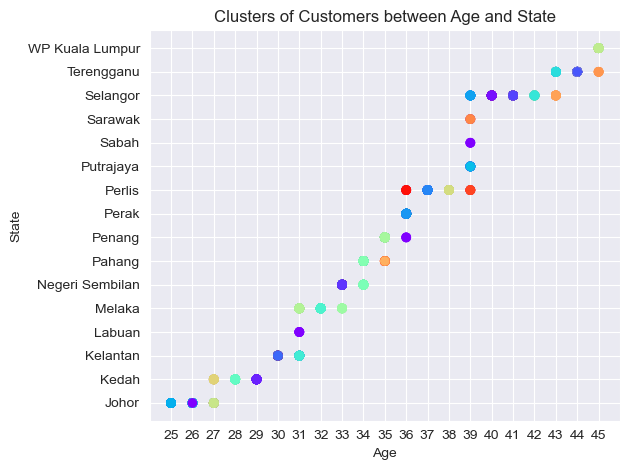

In [1192]:
plt.scatter(testset['Age'], testset['State'], c=y_pred, cmap='rainbow')
plt.title('Clusters of Customers between Age and State')
plt.yticks(np.arange(0, 16), le.inverse_transform(np.arange(0, 16)))
plt.xticks(np.arange(25, 46))
plt.xlabel('Age')
plt.ylabel('State')
plt.tight_layout()
plt.show()

### Print Age at each State

In [1193]:
#unencode State
for i in range(0, 16):
    test_age = int(testset[testset['State'] == i]['Age'].mean())
    state = le.inverse_transform([i])
    state = state[0]
    print(f"State {state}'s average age = {test_age}")

State Johor's average age = 25
State Kedah's average age = 28
State Kelantan's average age = 30
State Labuan's average age = 31
State Melaka's average age = 31
State Negeri Sembilan's average age = 33
State Pahang's average age = 34
State Penang's average age = 35
State Perak's average age = 36
State Perlis's average age = 37
State Putrajaya's average age = 39
State Sabah's average age = 39
State Sarawak's average age = 39
State Selangor's average age = 40
State Terengganu's average age = 43
State WP Kuala Lumpur's average age = 45


### Evaluate the model using Silhouette Score

In [1194]:
print(silhouette_score(testset, y_pred))

0.9365001452004044


## 2.2 Distribution of Total Items Sold by State

### Sales by State

In [1195]:
df_or['Items sold'] = df_or['Items sold'].astype(int)
total_sales_by_state = df_or.groupby('State')['Items sold'].sum().reset_index()

for index, row in total_sales_by_state.iterrows():
    state = row['State']
    total_items_sold = row['Items sold']
    print(f"State {state} total sales = {total_items_sold}")

State Johor total sales = 1604
State Kedah total sales = 1401
State Kelantan total sales = 1219
State Labuan total sales = 23
State Melaka total sales = 1708
State Negeri Sembilan total sales = 1566
State Pahang total sales = 1221
State Penang total sales = 753
State Perak total sales = 1086
State Perlis total sales = 1419
State Putrajaya total sales = 165
State Sabah total sales = 44
State Sarawak total sales = 49
State Selangor total sales = 2159
State Terengganu total sales = 1036
State WP Kuala Lumpur total sales = 569


### Visualize the distribution of total items sold by state

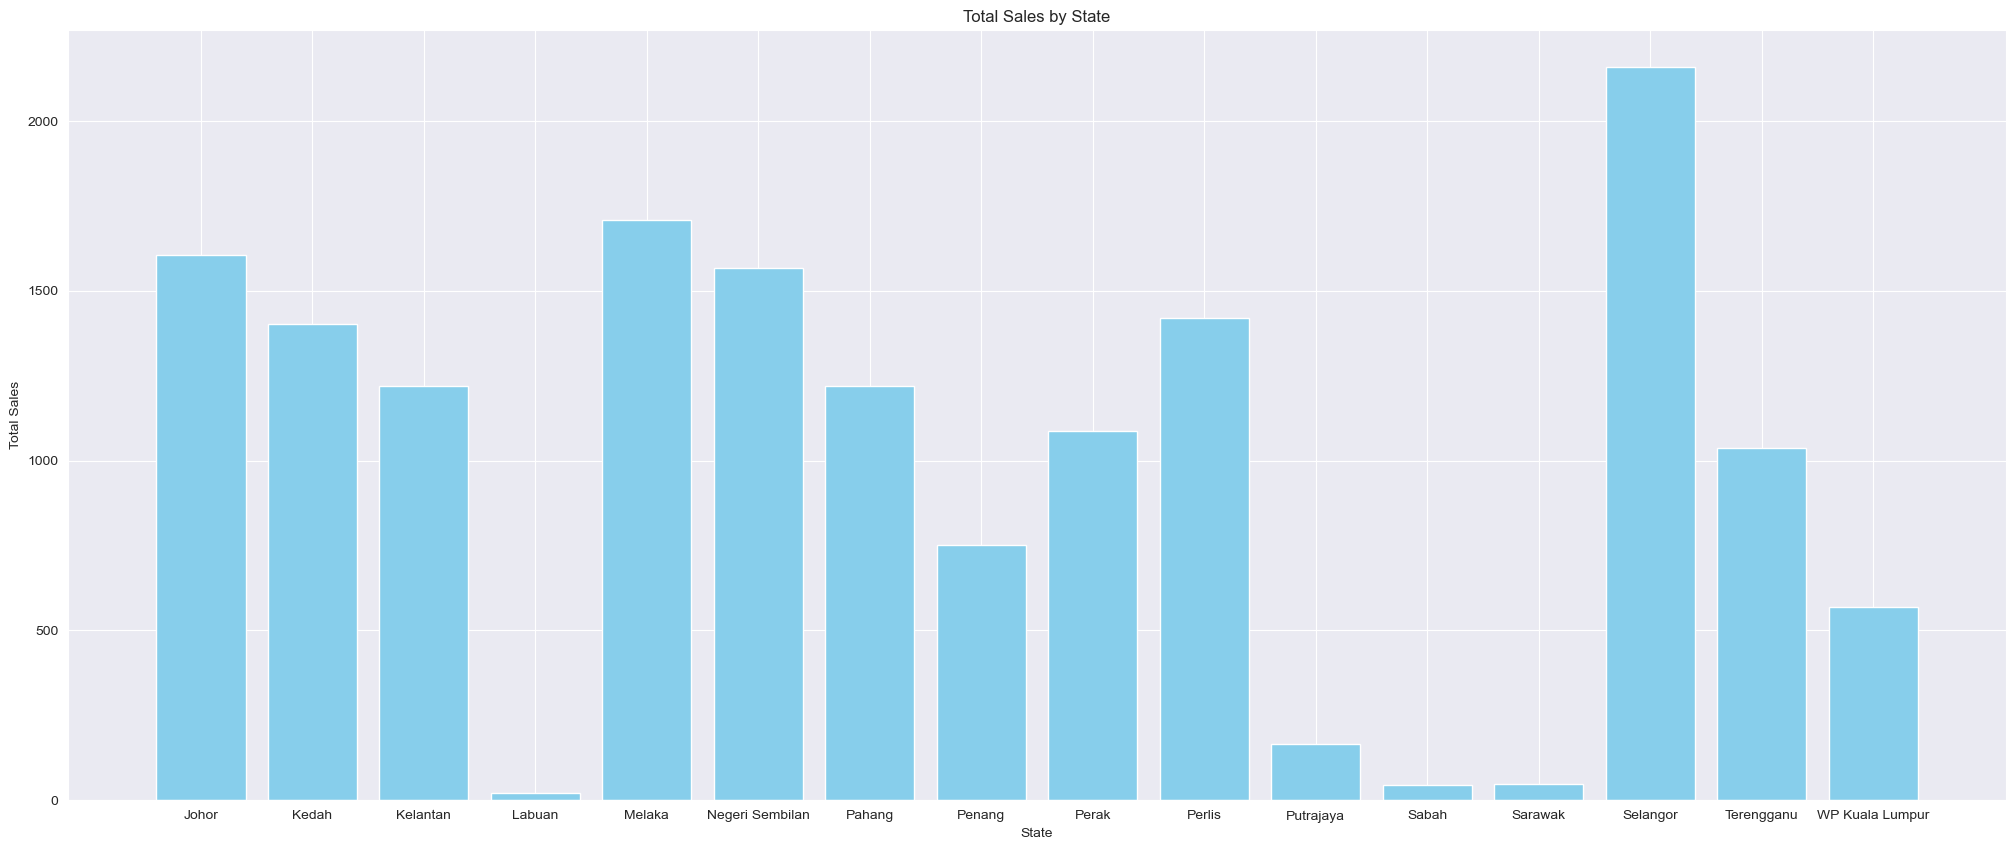

In [1196]:
plt.figure(figsize=(25, 10))
plt.bar(total_sales_by_state['State'], total_sales_by_state['Items sold'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.title('Total Sales by State')
plt.show()

## 2.3 Distribution of Total Revenue by State

In [1197]:
df_or['N. Revenue (formatted)'] = df_or['N. Revenue (formatted)'].replace({',': '', 'RM': ''}, regex=True).astype(float)
total_revenue_by_state = df_or.groupby('State')['N. Revenue (formatted)'].sum().reset_index()

for index, row in total_revenue_by_state.iterrows():
    state = row['State']
    total_revenue = row['N. Revenue (formatted)']
    print(f"State {state} total revenue = {total_revenue}")


State Johor total revenue = 55258.8
State Kedah total revenue = 46232.2
State Kelantan total revenue = 41770.5
State Labuan total revenue = 865.1
State Melaka total revenue = 56761.1
State Negeri Sembilan total revenue = 53255.6
State Pahang total revenue = 41644.8
State Penang total revenue = 25257.9
State Perak total revenue = 37586.7
State Perlis total revenue = 47355.8
State Putrajaya total revenue = 5573.1
State Sabah total revenue = 1513.6
State Sarawak total revenue = 1450.8
State Selangor total revenue = 74012.8
State Terengganu total revenue = 35559.0
State WP Kuala Lumpur total revenue = 18583.5


### Visualize the distribution of total revenue by state

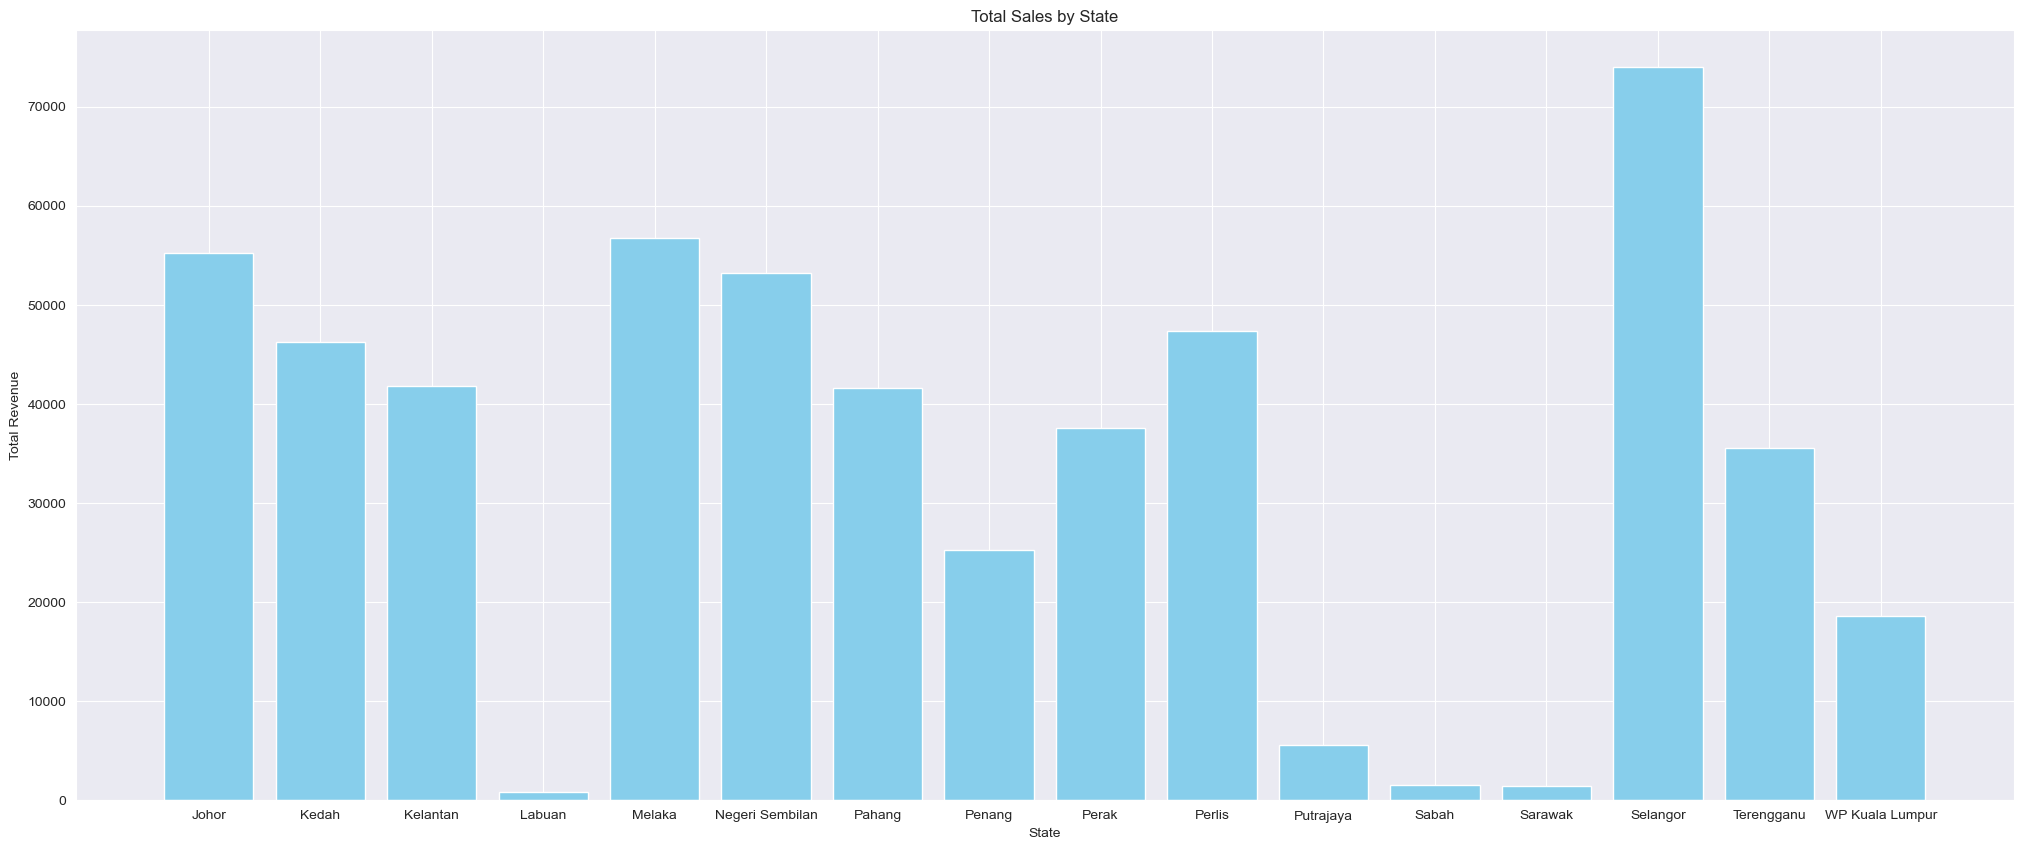

In [1198]:
plt.figure(figsize=(25, 10))
plt.bar(total_revenue_by_state['State'], total_revenue_by_state['N. Revenue (formatted)'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Total Revenue')
plt.title('Total Sales by State')
plt.show()

## 2.4 Distribution of Total Items Sold by Age

In [1199]:
age = df_or['Age']
total_sales_by_age = df_or.groupby('Age')['Items sold'].sum().reset_index()

for index, row in total_sales_by_age.iterrows():
    ages = row['Age']
    total_items_sold = row['Items sold']
    print(f"Age {ages} total sales = {total_items_sold}")

Age 25 total sales = 506
Age 26 total sales = 632
Age 27 total sales = 622
Age 28 total sales = 661
Age 29 total sales = 560
Age 30 total sales = 526
Age 31 total sales = 1175
Age 32 total sales = 1209
Age 33 total sales = 1124
Age 34 total sales = 1357
Age 35 total sales = 1108
Age 36 total sales = 1181
Age 37 total sales = 683
Age 38 total sales = 573
Age 39 total sales = 564
Age 40 total sales = 607
Age 41 total sales = 653
Age 42 total sales = 567
Age 43 total sales = 514
Age 44 total sales = 578
Age 45 total sales = 622


### Visualize the distribution of total items sold by age

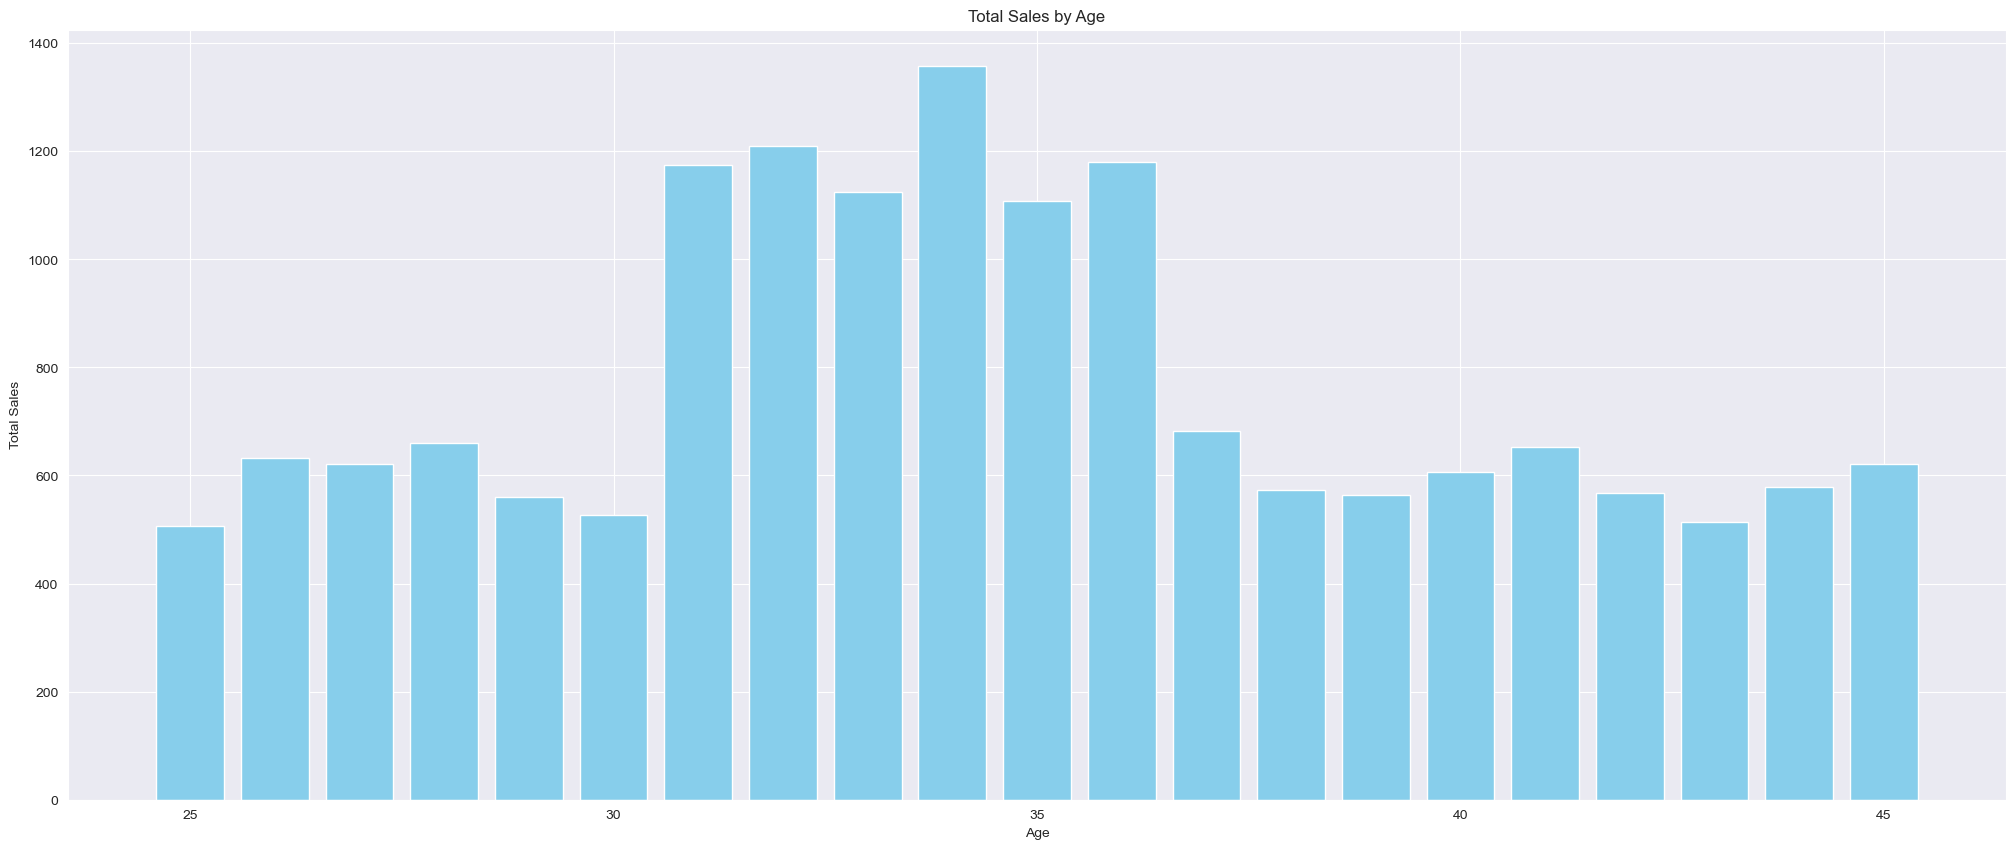

In [1200]:
plt.figure(figsize=(25, 10))
plt.bar(total_sales_by_age['Age'], total_sales_by_age['Items sold'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Total Sales')
plt.title('Total Sales by Age')
plt.show()

## 2.5 Distribution of Total Revenue by Age

In [1201]:
total_revenue_by_age = df_or.groupby('Age')['N. Revenue (formatted)'].sum().reset_index()

for index, row in total_revenue_by_age.iterrows():
    ages = row['Age']
    total_revenue = row['N. Revenue (formatted)']
    print(f"Age {ages} total revenue = {total_revenue}")

Age 25.0 total revenue = 17287.2
Age 26.0 total revenue = 22251.6
Age 27.0 total revenue = 20833.3
Age 28.0 total revenue = 21431.7
Age 29.0 total revenue = 18614.1
Age 30.0 total revenue = 18703.5
Age 31.0 total revenue = 38814.4
Age 32.0 total revenue = 40808.8
Age 33.0 total revenue = 37656.5
Age 34.0 total revenue = 46811.2
Age 35.0 total revenue = 37360.0
Age 36.0 total revenue = 40687.2
Age 37.0 total revenue = 22876.5
Age 38.0 total revenue = 19077.2
Age 39.0 total revenue = 19419.4
Age 40.0 total revenue = 21768.6
Age 41.0 total revenue = 21706.4
Age 42.0 total revenue = 18988.0
Age 43.0 total revenue = 17098.7
Age 44.0 total revenue = 20082.2
Age 45.0 total revenue = 20404.8


### Visualize the distribution of total revenue by age

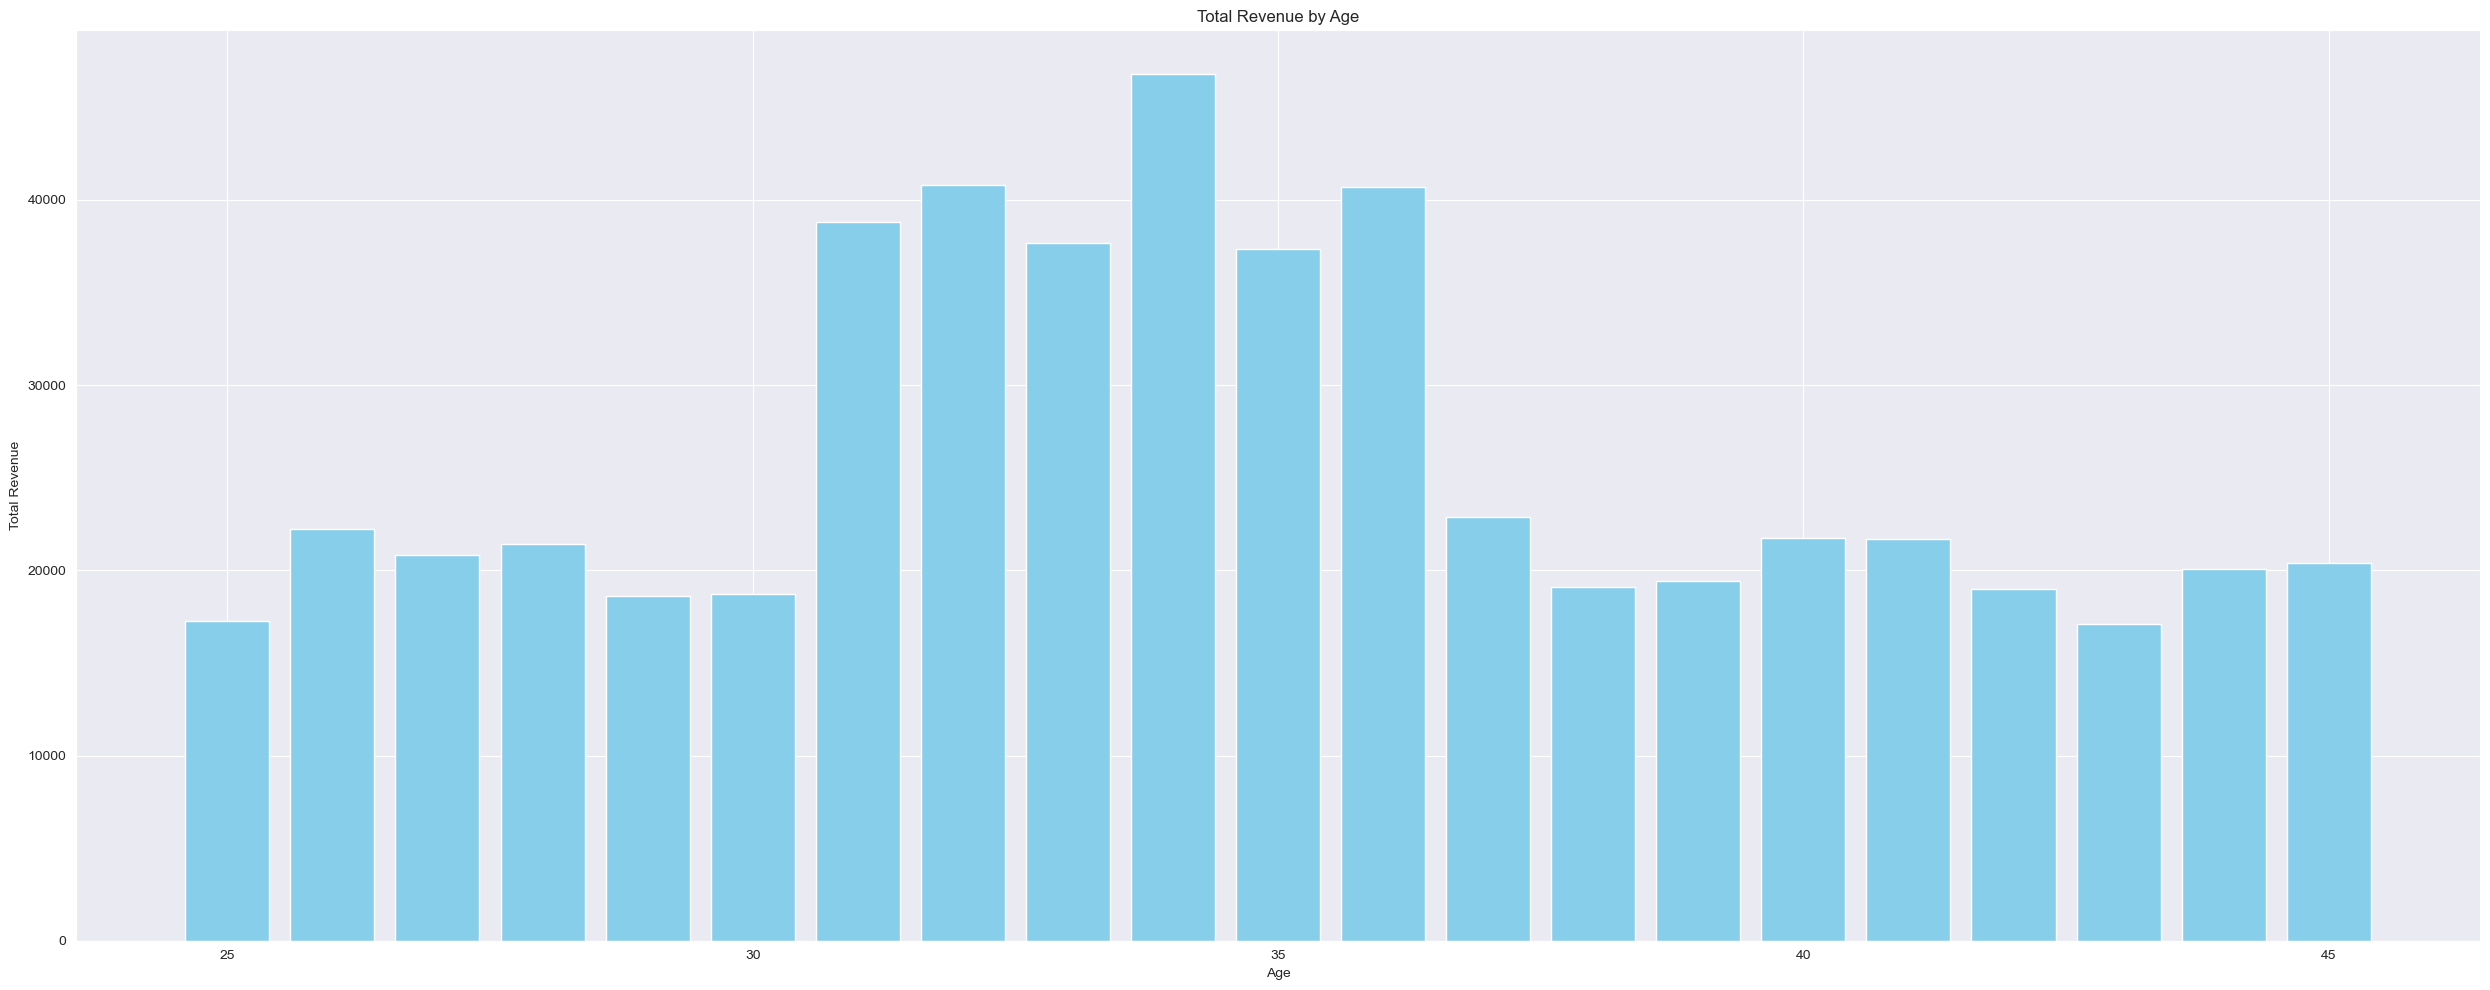

In [1202]:
plt.figure(figsize=(25, 10))
plt.bar(total_revenue_by_age['Age'], total_revenue_by_age['N. Revenue (formatted)'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Age')
plt.tight_layout()
plt.show()

## Prediction for next year's revenue based on state and age

In [1203]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_or['State'] = label_encoder.fit_transform(df_or['State'])
df_or['Gender'] = label_encoder.fit_transform(df_or['Gender'])
df_or['Customer type'] = label_encoder.fit_transform(df_or['Customer type'])
df_or.head()
correlation = df_or.corr()
display(correlation)

,Order #,N. Revenue (formatted),Customer type,Items sold,N. Revenue,State,Age,Gender,Customer type enc,Gender_enc,State_enc
Order #,1.000000,-0.004167,0.099050,-0.084797,-0.004348,0.009881,0.010642,0.000831,0.099050,0.000831,0.009881
N. Revenue (formatted),-0.004167,1.000000,0.075617,0.914142,0.999922,0.003712,0.002079,0.003589,0.075617,0.003589,0.003712
Customer type,0.099050,0.075617,1.000000,0.035785,0.075763,0.003157,0.001572,-0.001994,1.000000,-0.001994,0.003157
Items sold,-0.084797,0.914142,0.035785,1.000000,0.914276,0.003234,0.002437,-0.001941,0.035785,-0.001941,0.003234
N. Revenue,-0.004348,0.999922,0.075763,0.914276,1.000000,0.003794,0.002184,0.003381,0.075763,0.003381,0.003794
State,0.009881,0.003712,0.003157,0.003234,0.003794,1.000000,0.984292,0.000308,0.003157,0.000308,1.000000
Age,0.010642,0.002079,0.001572,0.002437,0.002184,0.984292,1.000000,0.002417,0.001572,0.002417,0.984292
Gender,0.000831,0.003589,-0.001994,-0.001941,0.003381,0.000308,0.002417,1.000000,-0.001994,1.000000,0.000308
Customer type enc,0.099050,0.075617,1.000000,0.035785,0.075763,0.003157,0.001572,-0.001994,1.000000,-0.001994,0.003157
Gender_enc,0.000831,0.003589,-0.001994,-0.001941,0.003381,0.000308,0.002417,1.000000,-0.001994,1.000000,0.000308


### Correlation Matrix and Heatmap

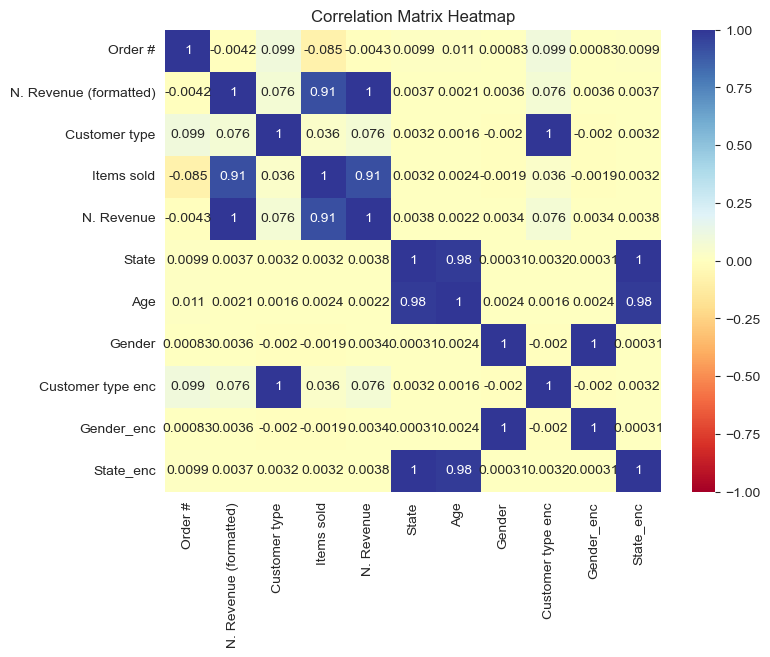

In [1204]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='RdYlBu', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Split the dataset into training and testing sets

In [1205]:
from sklearn.model_selection import train_test_split
X = df_or.drop(columns=['Order #','Date','Status', 'N. Revenue (formatted)','N. Revenue','Product(s)', 'Customer' ])
y = df_or['N. Revenue']
X.head()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

### Train the model using Linear Regression

In [1206]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Make predictions on the testing set

In [1207]:
prediction_test = model.predict(X_test)
prediction_train = model.predict(X_train)

### Evaluate the model

In [1208]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, prediction_test)
r2 = r2_score(y_test, prediction_test)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1117.9548659995012
R-squared: 0.93465822304262


### Predict the Revenue for Next Year (Overall)

In [1209]:
last_year_revenue = df_or['N. Revenue (formatted)'].sum()
growth_rate = 0.10

# Project sales for next year
projected_total_sales = (last_year_revenue * (1 + growth_rate)).__round__(2)

print(f"Projected sales for next year: {projected_total_sales}")

Projected sales for next year: 596949.43


### Predict the Sales for Next Year based on Age distribution

In [1210]:
last_year_sales = 553765
growth_rate = 0.10

for index, row in total_revenue_by_age.iterrows():
    age = row['Age']
    total_revenue = row['N. Revenue (formatted)']
    projected_sales = (total_revenue * (1 + growth_rate)).__round__(2)
    print(f"Projected sales for Age {age} for next year: {projected_sales}")

Projected sales for Age 25.0 for next year: 19015.92
Projected sales for Age 26.0 for next year: 24476.76
Projected sales for Age 27.0 for next year: 22916.63
Projected sales for Age 28.0 for next year: 23574.87
Projected sales for Age 29.0 for next year: 20475.51
Projected sales for Age 30.0 for next year: 20573.85
Projected sales for Age 31.0 for next year: 42695.84
Projected sales for Age 32.0 for next year: 44889.68
Projected sales for Age 33.0 for next year: 41422.15
Projected sales for Age 34.0 for next year: 51492.32
Projected sales for Age 35.0 for next year: 41096.0
Projected sales for Age 36.0 for next year: 44755.92
Projected sales for Age 37.0 for next year: 25164.15
Projected sales for Age 38.0 for next year: 20984.92
Projected sales for Age 39.0 for next year: 21361.34
Projected sales for Age 40.0 for next year: 23945.46
Projected sales for Age 41.0 for next year: 23877.04
Projected sales for Age 42.0 for next year: 20886.8
Projected sales for Age 43.0 for next year: 1880

### Visualize the Predicted Sales for Next Year based on Age distribution

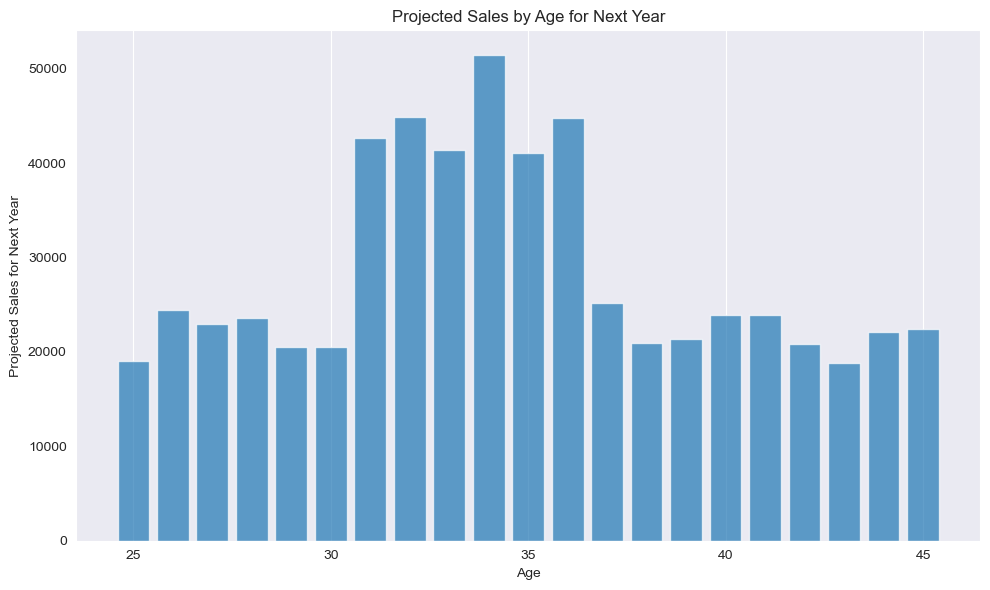

In [1211]:
projected_sales = [(total_revenue * (1 + growth_rate)) for total_revenue in total_revenue_by_age['N. Revenue (formatted)']]

plt.figure(figsize=(10, 6))

plt.bar(total_revenue_by_age['Age'], projected_sales, alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Projected Sales for Next Year')
plt.title('Projected Sales by Age for Next Year')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 3. Identifying Best-Selling Products

### Split the Dataset into Training and Testing Sets

In [1212]:
X = df_pl[['Product', 'N. Revenue', 'Orders']]
le = LabelEncoder()
X['Product'] = le.fit_transform(X['Product'])
y = df_pl['Items sold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train Model using Random Forest Regressor

In [1213]:
# # Create and train a Random Forest Regressor
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = model.predict(X_test)

### Train Model using Linear Regression

In [1214]:
# use linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

### Model Evaluation

In [1215]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 50.60064301741112
R-squared: 0.9998223886851934


## Predict Best Selling Product for 2023

In [1216]:
# Predict the number of items sold for each product
predicted_items_sold = model.predict(X)

# Identify the best-selling product
best_selling_product_index = predicted_items_sold.argmax()
best_selling_product = df_pl.loc[best_selling_product_index, 'Product'] 

print(f'The best-selling product for 2023 is: {best_selling_product}')

The best-selling product for 2023 is: LIP BOOSTER - WATERMELON


## Prediction for 2024 ProductList

In [1217]:
df_pl_2024 = df_pl.copy()
# add a new column for predicted items sold
df_pl_2024['Predicted items sold 2024'] = predicted_items_sold
# multiply the predicted items sold by 1.1
df_pl_2024['Predicted items sold 2024'] = df_pl_2024['Predicted items sold 2024'] * 1.1 
df_pl_2024['Predicted items sold 2024'] = df_pl_2024['Predicted items sold 2024'].astype(int)
#predict number of orders should be made based on the predicted items sold
df_pl_2024['Conversion rate'] = df_pl['Orders'] / df_pl['Items sold']
df_pl_2024['Predicted orders 2024'] = df_pl_2024['Predicted items sold 2024'] / df_pl_2024['Conversion rate']
df_pl_2024['Predicted orders 2024'] = df_pl_2024['Predicted orders 2024'].astype(int)
#predict revenue based on the predicted items sold
df_pl_2024['Price'] = df_pl['N. Revenue'] / df_pl['Orders']
df_pl_2024['Predicted revenue 2024'] = df_pl_2024['Predicted items sold 2024'] * df_pl_2024['Price']
df_pl_2024['Predicted revenue 2024'] = df_pl_2024['Predicted revenue 2024'].astype(int)
# rename N. Revenue to Past Revenue
df_pl_2024 = df_pl_2024.rename(columns={'N. Revenue': 'Past Revenue'})
# rename Orders to Past Orders
df_pl_2024 = df_pl_2024.rename(columns={'Orders': 'Past Orders'})
# rename Items sold to Past Items sold
df_pl_2024 = df_pl_2024.rename(columns={'Items sold': 'Past Items sold'})
# rename Stock to Past Stock
df_pl_2024 = df_pl_2024.rename(columns={'Stock': 'Past Stock'})
# rename Status to Past Status
df_pl_2024 = df_pl_2024.rename(columns={'Status': 'Past Status'})
# rename Status enc to Past Status enc
df_pl_2024 = df_pl_2024.rename(columns={'Status enc': 'Past Status enc'})

## Prediction for 2025 ProductList

In [1218]:
# predict items sold for each product for the year 2025 based on 2024
df_pl_2025 = df_pl_2024.copy()
# remove all the past columns 
df_pl_2025 = df_pl_2025.drop(columns=['Past Revenue', 'Past Orders', 'Past Items sold', 'Past Stock', 'Past Status', 'Past Status enc'])
# rename Predicted items sold 2024 to Past Items sold
df_pl_2025 = df_pl_2025.rename(columns={'Predicted items sold 2024': 'Past Items sold'})
# rename Predicted orders 2024 to Past Orders
df_pl_2025 = df_pl_2025.rename(columns={'Predicted orders 2024': 'Past Stock'})
# rename Predicted revenue 2024 to Past Revenue
df_pl_2025 = df_pl_2025.rename(columns={'Predicted revenue 2024': 'Past Revenue'})
# rename Predicted orders 2024 to Past Stock

# new column for predicted items sold 2025
df_pl_2025['Predicted items sold 2025'] = predicted_items_sold
# multiply the predicted items sold by 1.1 * 1.1
df_pl_2025['Predicted items sold 2025'] = df_pl_2025['Predicted items sold 2025'] * 1.1 * 1.1
df_pl_2025['Predicted items sold 2025'] = df_pl_2025['Predicted items sold 2025'].astype(int)
#predict number of orders should be made based on the predicted items sold
df_pl_2025['Conversion rate'] = df_pl_2024['Past Orders'] / df_pl_2024['Past Items sold']
df_pl_2025['Predicted orders 2025'] = df_pl_2025['Predicted items sold 2025'] / df_pl_2025['Conversion rate']
df_pl_2025['Predicted orders 2025'] = df_pl_2025['Predicted orders 2025'].astype(int)
#predict revenue based on the predicted items sold
df_pl_2025['Price'] = df_pl_2025['Past Revenue'] / df_pl_2024['Past Orders']
df_pl_2025['Predicted revenue 2025'] = df_pl_2025['Predicted items sold 2025'] * df_pl_2025['Price']
df_pl_2025['Predicted revenue 2025'] = df_pl_2025['Predicted revenue 2025'].astype(int)

## Convert the Predicted Items Sold to a DataFrame

In [1219]:
# display the dataframe
display(df_pl_2024.head())
display(df_pl_2025.head())

# save to csv
# add header to true
df_pl_2024.to_csv('datasets/ProductList_2024.csv', index=False, header=True)
df_pl_2025.to_csv('datasets/ProductList_2025.csv', index=False, header=True)

,Product,SKU,Past Items sold,Past Revenue,Past Orders,Past Status,Past Stock,Past Status enc,Predicted items sold 2024,Conversion rate,Predicted orders 2024,Price,Predicted revenue 2024
0,LIP BOOSTER - WATERMELON,95,2590,63270.9,2299,In stock,11,0,2827,0.887645,3184,27.521053,77802
1,LIP BOOSTER - STRAWBERRY,96,2563,63768.9,2280,In stock,134,0,2806,0.889583,3154,27.968816,78480
2,COLLAGEN SERUM FOUNDATION ALHA ALFA - MEDIUM,98,1067,7435.1,1005,In stock,33,0,1178,0.941893,1250,7.398109,8714
3,COLLAGEN SERUM FOUNDATION ALHA ALFA - LIGHT,97,728,7135.7,690,In stock,41,0,813,0.947802,857,10.341594,8407
4,LIP BOOSTER - MELON,100,651,16209.9,587,In stock,177,0,720,0.901690,798,27.614821,19882


,Product,SKU,Past Items sold,Conversion rate,Past Stock,Price,Past Revenue,Predicted items sold 2025,Predicted orders 2025,Predicted revenue 2025
0,LIP BOOSTER - WATERMELON,95,2827,0.887645,3184,33.841670,77802,3110,3503,105247
1,LIP BOOSTER - STRAWBERRY,96,2806,0.889583,3154,34.421053,78480,3087,3470,106257
2,COLLAGEN SERUM FOUNDATION ALHA ALFA - MEDIUM,98,1178,0.941893,1250,8.670647,8714,1295,1374,11228
3,COLLAGEN SERUM FOUNDATION ALHA ALFA - LIGHT,97,813,0.947802,857,12.184058,8407,895,944,10904
4,LIP BOOSTER - MELON,100,720,0.901690,798,33.870528,19882,792,878,26825


## Visualizing the Predictions

### Correlation Matrix and Heatmap for ProductList

,SKU,Items sold,N. Revenue,Orders,Stock,Status enc
SKU,1.000000,0.249647,0.196588,0.253374,-0.283340,-0.120486
Items sold,0.249647,1.000000,0.965229,0.999743,0.003703,-0.126438
N. Revenue,0.196588,0.965229,1.000000,0.961153,-0.001204,-0.115258
Orders,0.253374,0.999743,0.961153,1.000000,0.003032,-0.130066
Stock,-0.283340,0.003703,-0.001204,0.003032,1.000000,-0.244943
Status enc,-0.120486,-0.126438,-0.115258,-0.130066,-0.244943,1.000000


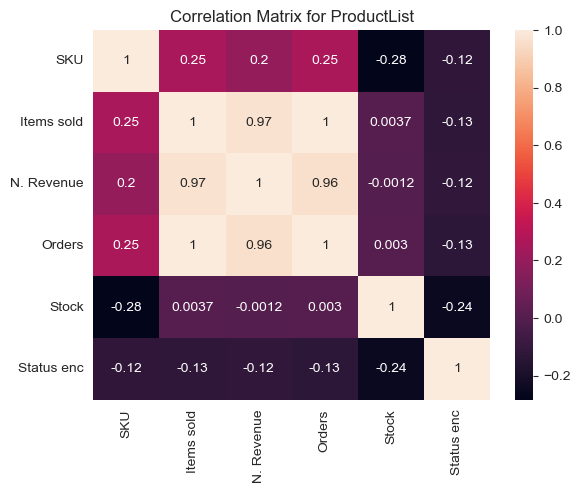

In [1220]:
# Create correlation matrix
corr_matrix = df_pl.corr()
display(corr_matrix)

# Create a heatmap
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix for ProductList')
plt.show()


### Scatter Plot for Predicted Items Sold vs. Actual Items Sold

111 111


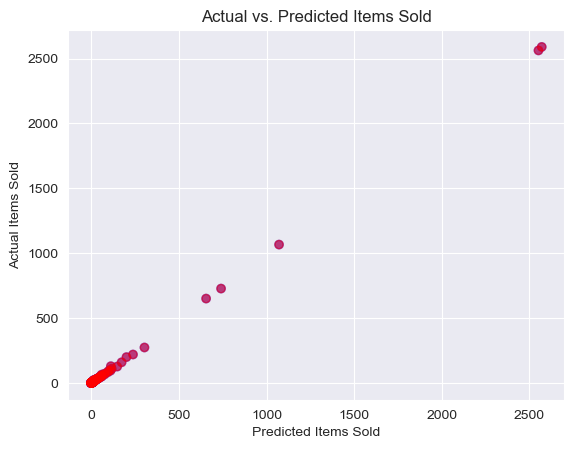

In [1221]:
# visualize the best-selling product
# Create a DataFrame from the predicted and actual values
df = pd.DataFrame({'predicted': predicted_items_sold, 'actual': y})
# print(df)

# Check the lengths of 'predicted' and 'actual'
print(len(df['predicted']), len(df['actual']))

# Plot the DataFrame as a scatter plot and make both different colors
colors = ['blue' for _ in range(len(df['predicted']))] + ['red' for _ in range(len(df['actual']))]
plt.scatter(df['predicted'].append(df['predicted']),
                df['actual'].append(df['actual']),
                c=colors,
                alpha=0.5)

# Add a line for perfect correlation.
# y = df['actual']
# plt.plot(np.unique(df['predicted']), np.poly1d(np.polyfit(df['predicted'], y, 1))(np.unique(df['predicted'])))
plt.xlabel('Predicted Items Sold')
plt.ylabel('Actual Items Sold')
plt.title('Actual vs. Predicted Items Sold')
plt.show()

     predicted  actual
0  2570.288467    2590


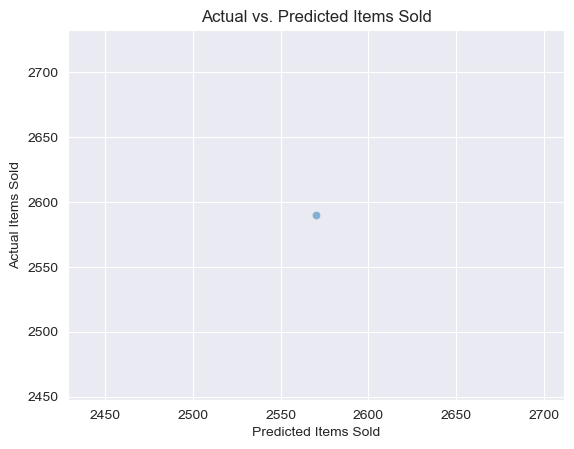

In [1222]:
# visualize the product with the highest number of items sold
# Create a DataFrame from the predicted and actual values
df = pd.DataFrame({'predicted': predicted_items_sold, 'actual': y})

# Filter the DataFrame to only include the best-selling product

df = df[df['actual'] == df['actual'].max()]
print(df)

# Plot the DataFrame as a scatter plot
sns.scatterplot(data=df, x='predicted', y='actual', alpha=0.5)
# draw a line
plt.xlabel('Predicted Items Sold')
plt.ylabel('Actual Items Sold')
plt.title('Actual vs. Predicted Items Sold')
plt.show()

,residuals,predicted
0,19.711533,2570.288467
1,11.307542,2551.692458
2,-3.923627,1070.923627
3,-11.965474,739.965474
4,-3.627350,654.627350


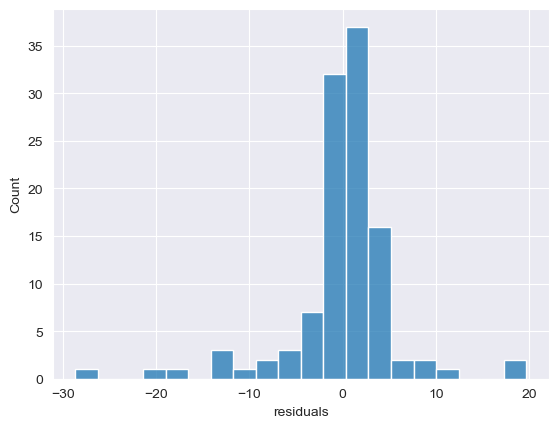

In [1223]:
# Visualize the residuals
# Calculate the residuals
residuals = y - predicted_items_sold # residual = actual - predicted

# Create a DataFrame of the residuals
df = pd.DataFrame({'residuals': residuals, 'predicted': predicted_items_sold})
display(df.head())

# Plot the residuals as a histogram
sns.histplot(data=df, x='residuals', bins=20)
plt.show()

# Streamlining Inventory Management


## Year 2024

In [1224]:
# Data Preprocessing
df_pl_2024 = pd.read_csv('datasets/ProductList_2024.csv')

X = df_pl_2024[['Past Items sold', 'Past Stock', 'Product']]
y = df_pl_2024['Predicted items sold 2024']

# label encode the product column
le = LabelEncoder()
X['Product'] = le.fit_transform(X['Product'])


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose a Model (Linear Regression)
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error (Linear Regression): {mae}')
print(f'Mean Squared Error (Linear Regression): {mse}')


Mean Absolute Error (Linear Regression): 4.517494188646526
Mean Squared Error (Linear Regression): 58.659888162783865


In [1225]:
# Features for predicting inventory
full_data = df_pl_2024.copy()
X_full_data = full_data[['Past Items sold', 'Past Stock', 'Product']]
X_full_data['Product'] = le.fit_transform(X_full_data['Product'])

# Standardize the features using the scaler
X_full_data_scaled = scaler.transform(X_full_data)

# Make predictions for inventory for all products
inventory_predictions_all = model.predict(X_full_data_scaled)

# Add the inventory predictions to a new column in the original dataset
full_data['Predicted Inventory'] = inventory_predictions_all
full_data['Predicted Inventory'] = full_data['Predicted Inventory'].astype(int)

# Display the full_data DataFrame with predicted inventory for all products
display(full_data.head())

# Save the full_data DataFrame to a CSV file
full_data.to_csv('datasets/ProductList_2024.csv', index=False)

,Product,SKU,Past Items sold,Past Revenue,Past Orders,Past Status,Past Stock,Past Status enc,Predicted items sold 2024,Conversion rate,Predicted orders 2024,Price,Predicted revenue 2024,Predicted Inventory
0,LIP BOOSTER - WATERMELON,95,2590,63270.9,2299,In stock,11,0,2827,0.887645,3184,27.521053,77802,2847
1,LIP BOOSTER - STRAWBERRY,96,2563,63768.9,2280,In stock,134,0,2806,0.889583,3154,27.968816,78480,2817
2,COLLAGEN SERUM FOUNDATION ALHA ALFA - MEDIUM,98,1067,7435.1,1005,In stock,33,0,1178,0.941893,1250,7.398109,8714,1172
3,COLLAGEN SERUM FOUNDATION ALHA ALFA - LIGHT,97,728,7135.7,690,In stock,41,0,813,0.947802,857,10.341594,8407,800
4,LIP BOOSTER - MELON,100,651,16209.9,587,In stock,177,0,720,0.901690,798,27.614821,19882,715


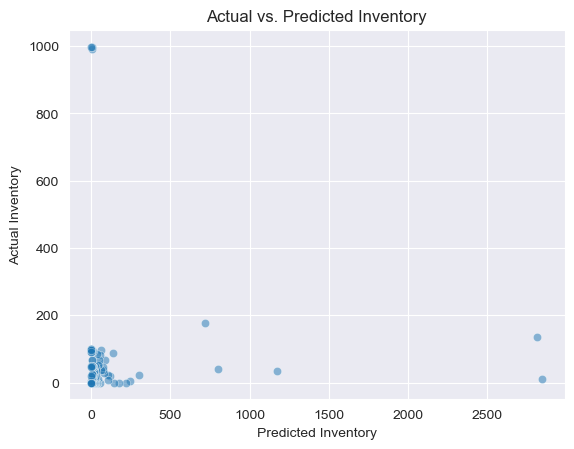

In [1226]:
# Visualize the inventory predictions for all products
df = pd.DataFrame({'predicted': inventory_predictions_all, 'actual': df_pl_2024['Past Stock']})

# Plot the DataFrame as a scatter plot
sns.scatterplot(data=df, x='predicted', y='actual', alpha=0.5)
plt.xlabel('Predicted Inventory')
plt.ylabel('Actual Inventory')
plt.title('Actual vs. Predicted Inventory')
plt.show()

## Year 2025

In [1227]:
df_pl_2025 = pd.read_csv('datasets/ProductList_2025.csv')

X = df_pl_2025[['Past Items sold', 'Past Stock', 'Product']]
y = df_pl_2025['Predicted items sold 2025']

# label encode the product column
le = LabelEncoder()
X['Product'] = le.fit_transform(X['Product'])


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose a Model (Linear Regression)
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error (Linear Regression): {mae}')
print(f'Mean Squared Error (Linear Regression): {mse}')

Mean Absolute Error (Linear Regression): 0.3777120971360376
Mean Squared Error (Linear Regression): 0.21581667538798183


In [1228]:
# Features for predicting inventory
full_data = df_pl_2025.copy()
X_full_data = full_data[['Past Items sold', 'Past Stock', 'Product']]
X_full_data['Product'] = le.fit_transform(X_full_data['Product'])

# Standardize the features using the scaler
X_full_data_scaled = scaler.transform(X_full_data)

# Make predictions for inventory for all products
inventory_predictions_all = model.predict(X_full_data_scaled)

# Add the inventory predictions to a new column in the original dataset
full_data['Predicted Inventory'] = inventory_predictions_all
full_data['Predicted Inventory'] = full_data['Predicted Inventory'].astype(int)

# Display the full_data DataFrame with predicted inventory for all products
display(full_data.head())

# Save the full_data DataFrame to a CSV file
full_data.to_csv('datasets/ProductList_2025.csv', index=False)

,Product,SKU,Past Items sold,Conversion rate,Past Stock,Price,Past Revenue,Predicted items sold 2025,Predicted orders 2025,Predicted revenue 2025,Predicted Inventory
0,LIP BOOSTER - WATERMELON,95,2827,0.887645,3184,33.841670,77802,3110,3503,105247,3109
1,LIP BOOSTER - STRAWBERRY,96,2806,0.889583,3154,34.421053,78480,3087,3470,106257,3086
2,COLLAGEN SERUM FOUNDATION ALHA ALFA - MEDIUM,98,1178,0.941893,1250,8.670647,8714,1295,1374,11228,1295
3,COLLAGEN SERUM FOUNDATION ALHA ALFA - LIGHT,97,813,0.947802,857,12.184058,8407,895,944,10904,894
4,LIP BOOSTER - MELON,100,720,0.901690,798,33.870528,19882,792,878,26825,792


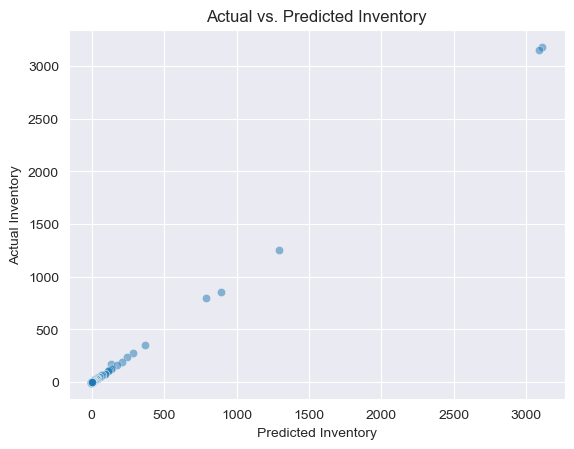

In [1229]:
# Visualize the inventory predictions for all products
df = pd.DataFrame({'predicted': inventory_predictions_all, 'actual': df_pl_2025['Past Stock']})

# Plot the DataFrame as a scatter plot
sns.scatterplot(data=df, x='predicted', y='actual', alpha=0.5)
plt.xlabel('Predicted Inventory')
plt.ylabel('Actual Inventory')
plt.title('Actual vs. Predicted Inventory')
plt.show()

# Viability of Monthly Subscription Plan


In [1230]:
# Load Order Report Dataset
order_df = pd.read_csv('datasets/OrderReports.csv')

# Remove ',' and 'RM', convert 'N. Revenue (formatted)' to float
order_df['N. Revenue (formatted)'] = order_df['N. Revenue (formatted)'].replace({',': '', 'RM': ''}, regex=True).astype(float)

# Convert 'Product(s)' to the count of products sold
order_df['Product Count'] = order_df['Items sold']

# Feature engineering
order_df['Avg Revenue per Item'] = order_df['N. Revenue'] / order_df['Items sold']

# convert State, Customer, Product(s), Gender, Customer type to categorical using label encoder
order_df['State'] = le.fit_transform(order_df['State'])
order_df['Customer'] = le.fit_transform(order_df['Customer'])
order_df['Product(s)'] = le.fit_transform(order_df['Product(s)'])
lb = LabelBinarizer
order_df['Gender'] = le.fit_transform(order_df['Gender'])
order_df['Customer type'] = le.fit_transform(order_df['Customer type'])
order_df['Status'] = le.fit_transform(order_df['Status'])

# convert Date to datetime
order_df['Date'] = pd.to_datetime(order_df['Date'])

# Define 'Interest' column based on certain criteria
interest_threshold = 600
order_df['Interest'] = ((order_df['N. Revenue (formatted)'] > interest_threshold) | (order_df['Product Count'] > 5)).astype(int)

# Define features (X) and target variable (Y)
X = order_df.drop(['Interest', 'Date',], axis=1)  # Exclude 'Date' from features
Y = order_df['Interest']

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(Y_test, predictions)
display(f"Accuracy: {accuracy}")

# predict the probability of interest
probabilities = model.predict_proba(X_test)
display(probabilities)

# predict the probability of interest for each customer
order_df['Probability of Interest'] = model.predict_proba(order_df.drop(['Interest', 'Date'], axis=1))[:, 1]
display(order_df.head())



'Accuracy: 0.9968808484092326'

array([[9.97148695e-01, 2.85130543e-03],
       [9.99999969e-01, 3.05042806e-08],
       [9.99999965e-01, 3.53672626e-08],
       ...,
       [9.99999851e-01, 1.48960025e-07],
       [1.00000000e+00, 2.50575537e-10],
       [9.95288565e-01, 4.71143500e-03]])

,Date,Order #,N. Revenue (formatted),Status,Customer,Customer type,Product(s),Items sold,N. Revenue,State,Age,Gender,Product Count,Avg Revenue per Item,Interest,Probability of Interest
0,2023-10-26 14:50:17,16698.0,57.8,1,19,0,398,2.0,49.8,8,36,0,2.0,24.9,0,8.364460e-07
1,2023-10-26 13:53:47,16697.0,32.9,1,1991,0,259,1.0,24.9,0,25,0,1.0,24.9,0,2.561875e-08
2,2023-10-26 13:04:17,16696.0,32.9,1,6993,0,259,1.0,24.9,4,31,0,1.0,24.9,0,2.550155e-08
3,2023-10-26 13:00:49,16695.0,82.7,1,1763,0,366,3.0,74.7,2,31,0,3.0,24.9,0,4.291531e-06
4,2023-10-26 12:47:36,16694.0,32.9,1,6114,0,370,1.0,24.9,9,38,0,1.0,24.9,0,3.849441e-08


In [1231]:
# predict the viability of monthly subscription plan
order_df['Viability of Monthly Subscription Plan'] = (order_df['Probability of Interest'] > 0.5).astype(int)
display(order_df.head())

order_df.to_csv('datasets/scam.csv', index= False, header= True)

,Date,Order #,N. Revenue (formatted),Status,Customer,Customer type,Product(s),Items sold,N. Revenue,State,Age,Gender,Product Count,Avg Revenue per Item,Interest,Probability of Interest,Viability of Monthly Subscription Plan
0,2023-10-26 14:50:17,16698.0,57.8,1,19,0,398,2.0,49.8,8,36,0,2.0,24.9,0,8.364460e-07,0
1,2023-10-26 13:53:47,16697.0,32.9,1,1991,0,259,1.0,24.9,0,25,0,1.0,24.9,0,2.561875e-08,0
2,2023-10-26 13:04:17,16696.0,32.9,1,6993,0,259,1.0,24.9,4,31,0,1.0,24.9,0,2.550155e-08,0
3,2023-10-26 13:00:49,16695.0,82.7,1,1763,0,366,3.0,74.7,2,31,0,3.0,24.9,0,4.291531e-06,0
4,2023-10-26 12:47:36,16694.0,32.9,1,6114,0,370,1.0,24.9,9,38,0,1.0,24.9,0,3.849441e-08,0


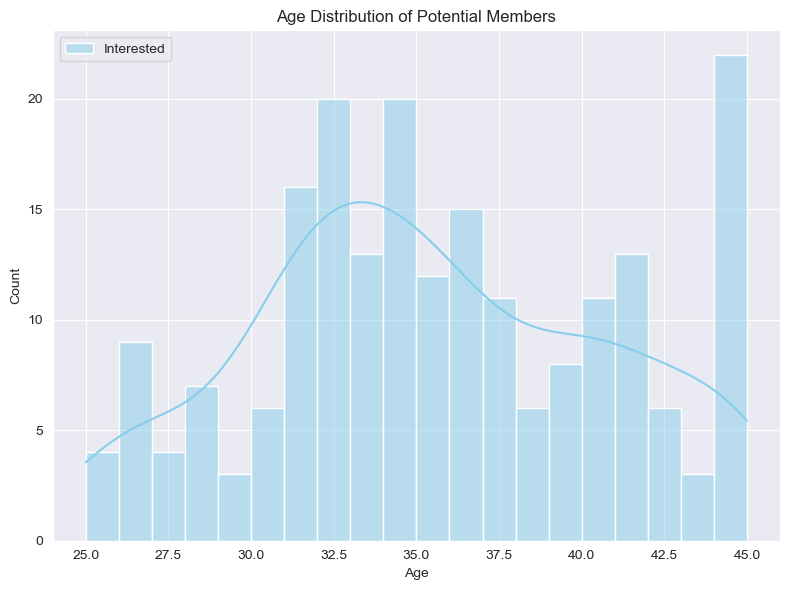

In [1232]:
# Example 1: Age Distribution of Potential Members
plt.figure(figsize=(8, 6))
sns.histplot(order_df[order_df['Interest'] == 1]['Age'], bins=20, kde=True, color='skyblue', label='Interested')
plt.title('Age Distribution of Potential Members')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()


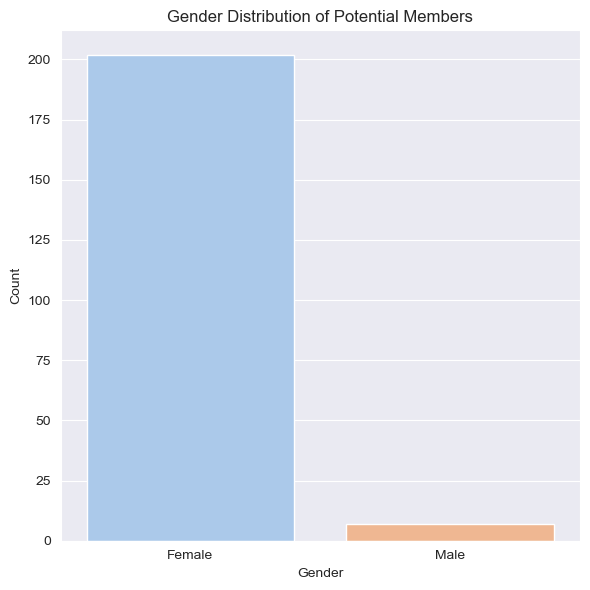

In [1233]:
# Example 2: Gender Distribution of Potential Members
plt.figure(figsize=(6, 6))
order_df_interested = order_df[order_df['Interest'] == 1]
sns.countplot(x='Gender', data=order_df_interested, palette='pastel')
plt.title('Gender Distribution of Potential Members')
plt.xlabel('Gender')
plt.xticks(np.arange(0, 2), ['Female', 'Male'])
plt.ylabel('Count')
plt.tight_layout()
plt.show()

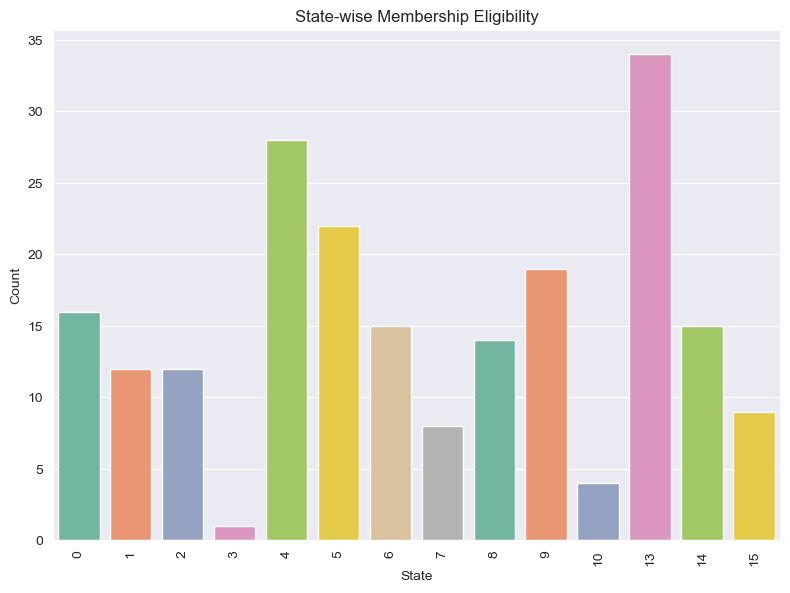

In [1234]:
# Example 3: State-wise Membership Eligibility
plt.figure(figsize=(8, 6))
sns.countplot(x='State', data=order_df_interested, palette='Set2')
plt.title('State-wise Membership Eligibility')
plt.xlabel('State')
plt.ylabel('Count')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

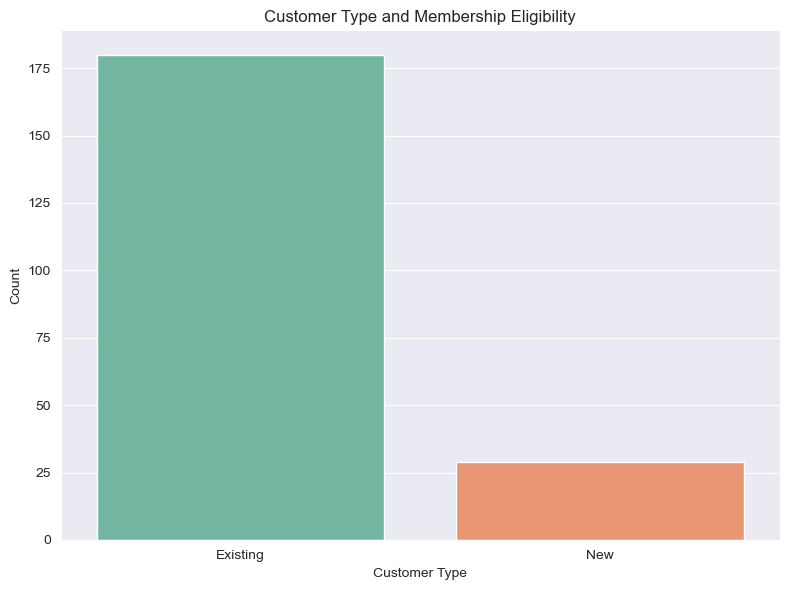

In [1235]:
# Example 4: Customer Type and Membership Eligibility
plt.figure(figsize=(8, 6))
sns.countplot(x='Customer type', data=order_df_interested, palette='Set2')
plt.title('Customer Type and Membership Eligibility')
plt.xlabel('Customer Type')
plt.ylabel('Count')
# legend for customer type
plt.xticks(np.arange(0, 2), ['Existing', 'New'])
plt.tight_layout()
plt.show()

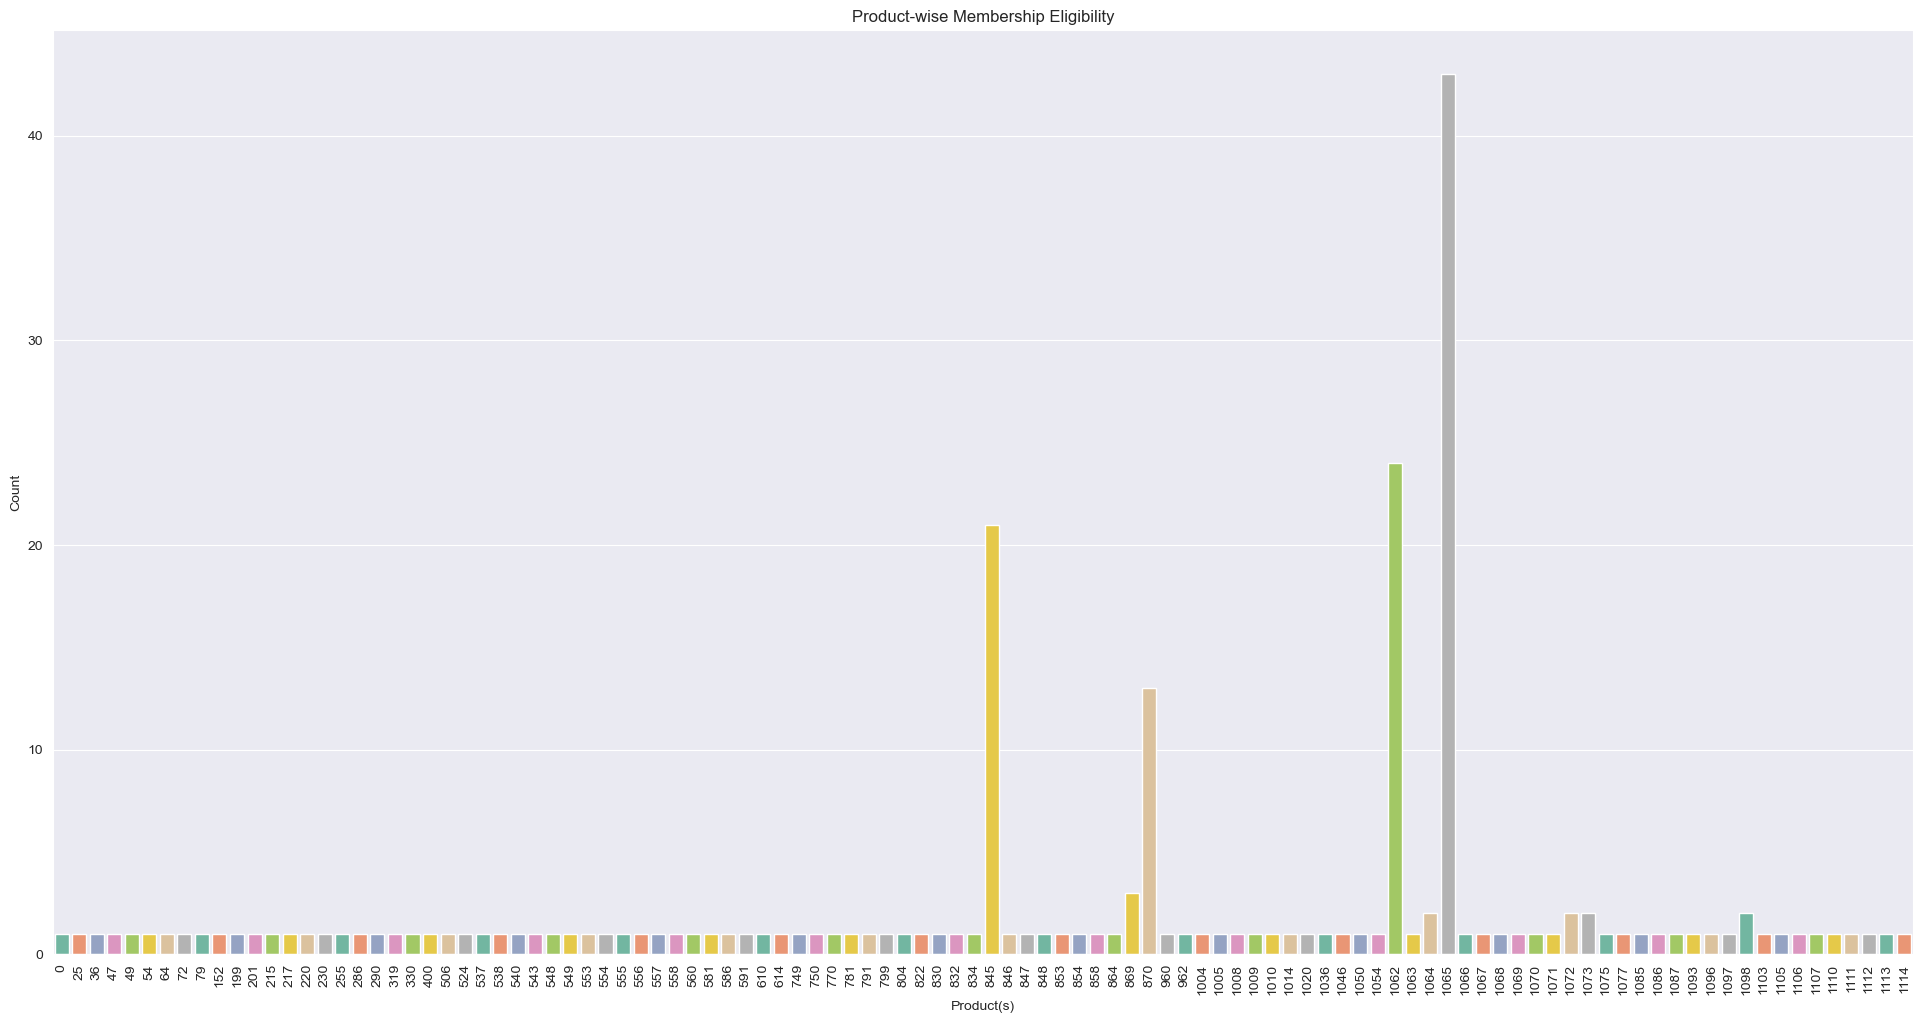

In [1236]:
# Example 5: Product-wise Membership Eligibility (DEEETING SOON)
# make figure bigger than 8, 6
plt.figure(figsize=(24, 12))
sns.countplot(x='Product(s)', data=order_df_interested, palette='Set2')
plt.title('Product-wise Membership Eligibility')
plt.xlabel('Product(s)')
plt.xticks(rotation=90)
plt.ylabel('Count')
# plt.tight_layout()
plt.show()

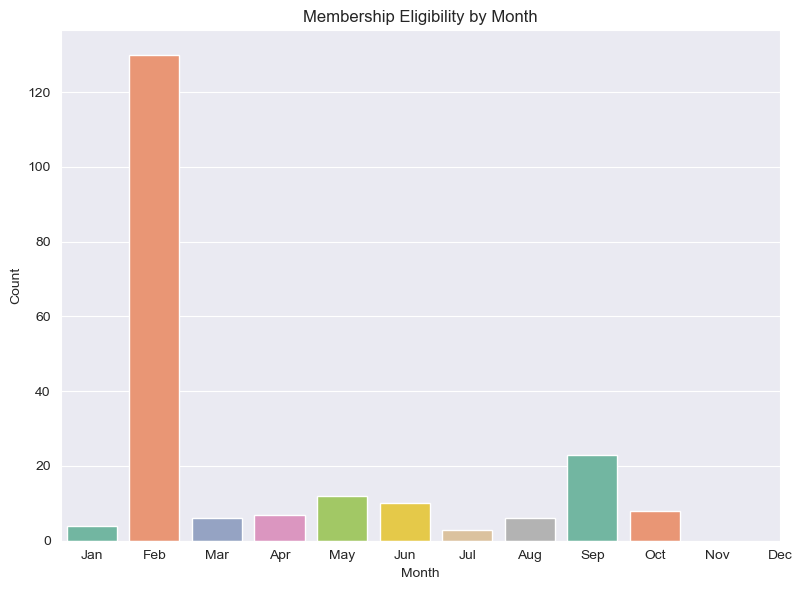

In [1237]:
# Example 6: Membership Eligibility by Month
plt.figure(figsize=(8, 6))
sns.countplot(x=order_df_interested['Date'].dt.month, data=order_df_interested, palette='Set2')
plt.title('Membership Eligibility by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.tight_layout()
# legend for month
plt.xticks(np.arange(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', "Nov", 'Dec'])
plt.show()

# Finding the Best Place to Open a New Branch: K-Means Clustering

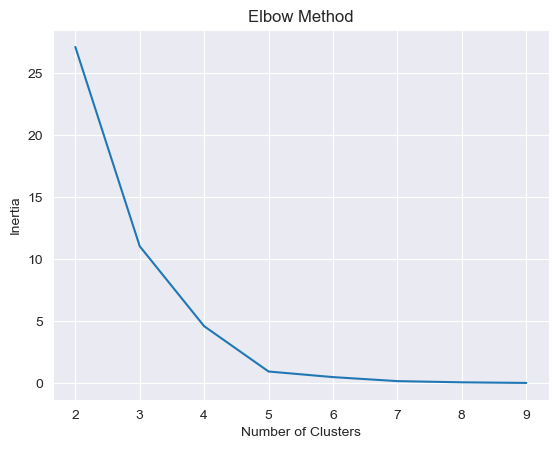

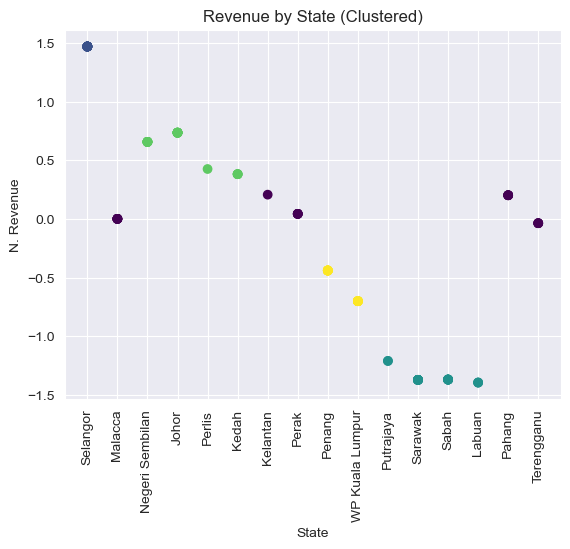

0.8399461970206005
              State  N. Revenue (formatted)                       Malls  \
54           Penang               -0.440165                Gurney Plaza   
55           Penang               -0.440165              Queensbay Mall   
56           Penang               -0.440165         Gurney Paragon Mall   
57           Penang               -0.440165             1st Avenue Mall   
58           Penang               -0.440165                Prangin Mall   
59           Penang               -0.440165        Sunway Carnival Mall   
60           Penang               -0.440165         Penang Times Square   
61           Penang               -0.440165     AEON Seberang Prai City   
62           Penang               -0.440165  Straits Quay Retail Marina   
63  WP Kuala Lumpur               -0.701530         Mid Valley Megamall   
64  WP Kuala Lumpur               -0.701530           The Gardens Mall    
65  WP Kuala Lumpur               -0.701530                 Pavilion KL   
66  WP

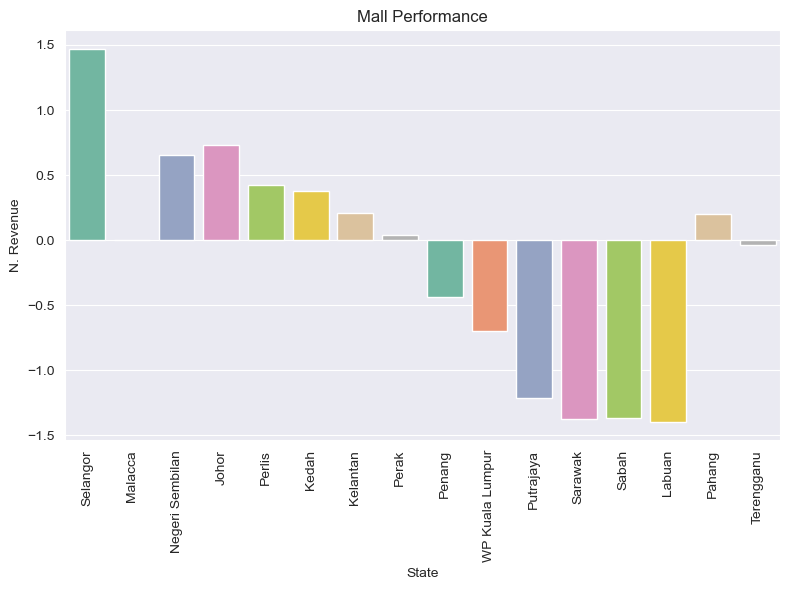

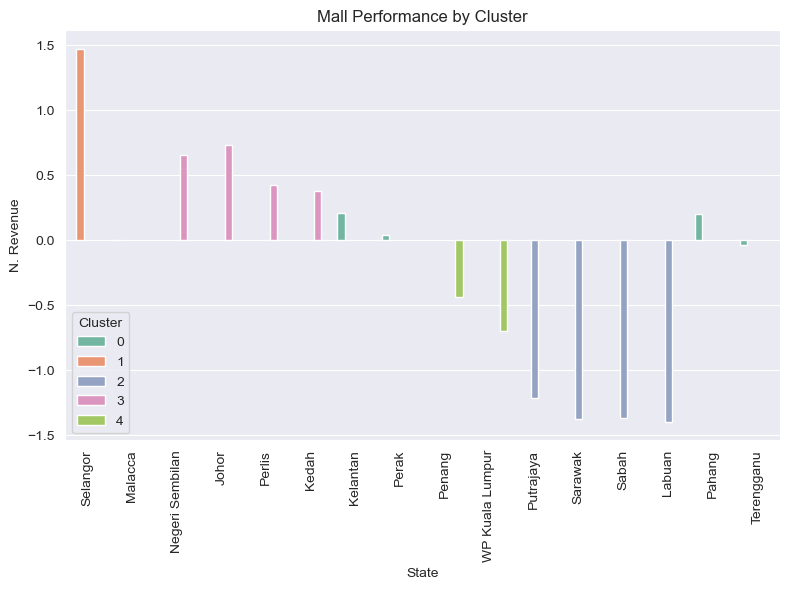

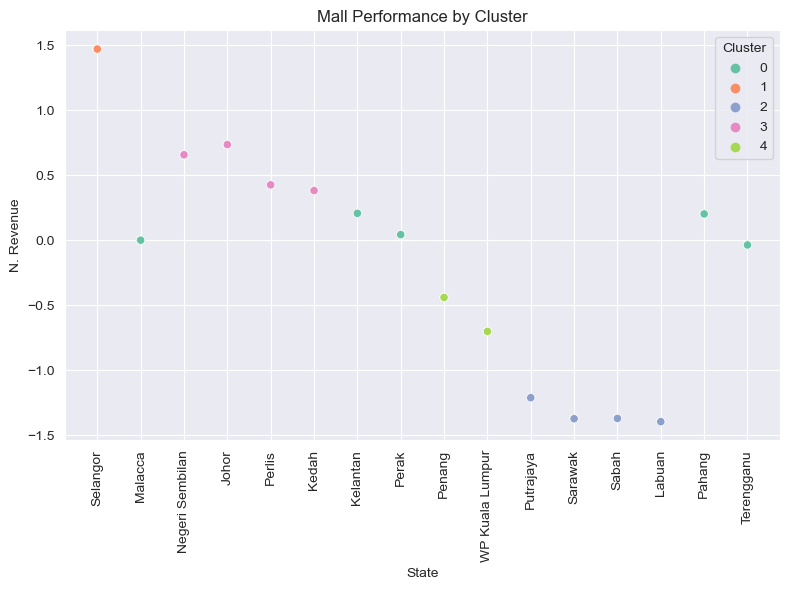

In [1238]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load Order Report and Malaysia Malls Datasets
order_df = pd.read_csv('datasets/OrderReports.csv')
malls_df = pd.read_csv('datasets/Malaysia Malls.csv')

order_df['N. Revenue (formatted)'] = order_df['N. Revenue (formatted)'].replace({',': '', 'RM': ''}, regex=True).astype(float)
# Customer Geographic Analysis
state_sales = order_df.groupby('State')['N. Revenue (formatted)'].sum().reset_index()

# Combine Mall and Revenue data
mall_performance = pd.merge(state_sales, malls_df, how='right', left_on='State', right_on='State')

# Feature scaling
scaler = StandardScaler()
mall_performance[['N. Revenue (formatted)']] = scaler.fit_transform(mall_performance[['N. Revenue (formatted)']])

# # identify missing values
# print(mall_performance.isnull().sum())

# fill missing values
mall_performance['N. Revenue (formatted)'] = mall_performance['N. Revenue (formatted)'].fillna(mall_performance['N. Revenue (formatted)'].mean())

tune = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(mall_performance[['N. Revenue (formatted)']])
    tune.append(kmeans.inertia_)
    
plt.plot(range(2, 10), tune)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


# K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # You may adjust the number of clusters
mall_performance['Cluster'] = kmeans.fit_predict(mall_performance[['N. Revenue (formatted)']])
# print(mall_performance.head())

# Visualize
plt.scatter(mall_performance['State'], mall_performance['N. Revenue (formatted)'], c=mall_performance['Cluster'], cmap='viridis')
plt.title('Revenue by State (Clustered)')
plt.xlabel('State')
# 90 degree rotation
plt.xticks(rotation=90)
plt.ylabel('N. Revenue')
plt.show()
# Evaluate the model
print(silhouette_score(mall_performance[['N. Revenue (formatted)']], mall_performance['Cluster']))

# Suggest Malls to Open New Branches
print(mall_performance[mall_performance['Cluster'] == 4])
print(mall_performance[mall_performance['Cluster'] == 3])
print(mall_performance[mall_performance['Cluster'] == 2])
print(mall_performance[mall_performance['Cluster'] == 1])
print(mall_performance[mall_performance['Cluster'] == 0])

# Barchart for mall performance
plt.figure(figsize=(8, 6))
sns.barplot(x='State', y='N. Revenue (formatted)', data=mall_performance, palette='Set2')
plt.title('Mall Performance')
plt.xlabel('State')
plt.ylabel('N. Revenue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Barchart for mall performance by cluster
plt.figure(figsize=(8, 6))
sns.barplot(x='State', y='N. Revenue (formatted)', data=mall_performance, hue='Cluster', palette='Set2')
plt.title('Mall Performance by Cluster')
plt.xlabel('State')
plt.ylabel('N. Revenue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Scatterplot for mall performance by cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x='State', y='N. Revenue (formatted)', data=mall_performance, hue='Cluster', palette='Set2')
plt.title('Mall Performance by Cluster')
plt.xlabel('State')
plt.ylabel('N. Revenue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




